## 1. Upload the Data
## 2. Cleaning missing data
## 3. Standarizing crop/country names
## 4. Handing outliers
## 5. Plotting trends

!dir

In [ ]:
!ls

In [ ]:
import pandas as pd

In [ ]:
df_all = pd.read_csv('Production_Crops_Livestock_E_All_Data.csv', low_memory=False)

In [ ]:
df_all.shape

In [ ]:
df_all.columns

In [ ]:
df_all.head(10)

In [ ]:
print(df_all['Unit'].unique())

In [ ]:
len(df_all['Area'].unique())

In [ ]:
print(df_all['Area'].unique())

In [ ]:
print(df_all['Element'].unique())

In [ ]:
## check missing data; Quick summary of nulls per column
df_all.isnull().sum()

In [ ]:
# Percentage of missing values per column
print((df_all.isnull().mean()*100).round(2))

In [ ]:
df_all = df_all.dropna(subset=['Area Code', 'Area Code (M49)', 'Area'])

In [ ]:
df_all.columns

In [ ]:
df_all['Unit'] = df_all['Unit'].fillna('unknown')

In [ ]:
##3.Standarizing crop/country names
df_all['Area'].unique()

In [ ]:
country_list ={
    'Syrian Arab Republic' : 'Syria',
    'Venezuela (Bolivarian Republic Of)': 'Venezuela',
    'United Republic Of Tanzania': 'Tanzania',
    'Netherlands (Kingdom Of The)' : 'Netherlands'
     }

In [ ]:
df_all['Area'] = df_all['Area'].replace(country_list)

In [ ]:
print(df_all['Area'])

In [ ]:
df_all['Item'].unique()

In [ ]:
#  Handle outliers:
from scipy import stats

In [ ]:
print(df_all.columns.tolist())

In [ ]:
df_head=df_all.head(10)

In [ ]:
df_head = pd.melt(
                  df_all, 
                  id_vars=['Area','Item', 'Element', 'Unit'],
                  var_name='Year',
                  value_name='Value')

In [ ]:
df_head

In [ ]:
ls

In [1]:
import pandas as pd

In [2]:
df_all=pd.read_csv("Production_Crops_Livestock_E_All_Data.csv", low_memory=False)

In [3]:
df_all.head(2)

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,Y1961,...,Y2020N,Y2021,Y2021F,Y2021N,Y2022,Y2022F,Y2022N,Y2023,Y2023F,Y2023N
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,ha,0.0,...,NaN,36862.0,A,NaN,36462.0,A,NaN,37000.0,A,NaN
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5412,Yield,kg/ha,NaN,...,NaN,1743.2,A,NaN,1742.0,A,NaN,1810.8,A,NaN


In [14]:
year_columns = [col for col in df_all.columns if col.startswith("Y")]
df_melted1= pd.melt(
                   df_all,
                   id_vars =['Area', 'Item'],
                   )

In [17]:
df_melted1.head(5)

,Area,Item,variable,value
0,Afghanistan,"Almonds, in shell",Area Code,2
1,Afghanistan,"Almonds, in shell",Area Code,2
2,Afghanistan,"Almonds, in shell",Area Code,2
3,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",Area Code,2
4,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",Area Code,2


In [24]:
year_columns = [col for col in df_all.columns if col.startswith("Y")]
df_melted= pd.melt(
                   df_all,
                   id_vars =['Area', 'Item'],
                   value_vars = year_columns,
                   var_name = 'Year',
                   value_name = 'Value')
df_melted['Year'] = df_melted['Year'].str.extract(r'Y(\d{4})')[0].astype(int)
df_melted = df_melted.dropna(subset=['Value'])
df_melted = df_melted[df_melted['Value'] != 0]

In [25]:
df_melted.head(5)

,Area,Item,Year,Value
6,Afghanistan,Apples,1961,2220.0
7,Afghanistan,Apples,1961,6801.8
8,Afghanistan,Apples,1961,15100.0
9,Afghanistan,Apricots,1961,4820.0
10,Afghanistan,Apricots,1961,6639.0


In [29]:
data_wheat = df_melted[df_melted['Item'] == 'Wheat']

In [36]:
data_wheat.head(5)

,Area,Item,Year,Value
189,Afghanistan,Wheat,1961,2230000.0
190,Afghanistan,Wheat,1961,1022.0
191,Afghanistan,Wheat,1961,2279000.0
524,Albania,Wheat,1961,126500.0
525,Albania,Wheat,1961,773.1


In [39]:
data_wheat['Value'] = pd.to_numeric(data_wheat['Value'], errors = 'coerce') 
data_wheat = data_wheat.dropna(subset = 'Value')

In [40]:
data_wheat.head(5)

,Area,Item,Year,Value
189,Afghanistan,Wheat,1961,2230000.0
190,Afghanistan,Wheat,1961,1022.0
191,Afghanistan,Wheat,1961,2279000.0
524,Albania,Wheat,1961,126500.0
525,Albania,Wheat,1961,773.1


In [44]:
trend_wheat = data_wheat.groupby('Year')['Value'].sum().reset_index()

In [45]:
trend_wheat

,Year,Value
0,1961,1.857128e+09
1,1962,1.996708e+09
2,1963,1.916451e+09
3,1964,2.111769e+09
4,1965,2.103867e+09
...,...,...
58,2019,4.415106e+09
59,2020,4.410664e+09
60,2021,4.495068e+09
61,2022,4.630301e+09


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

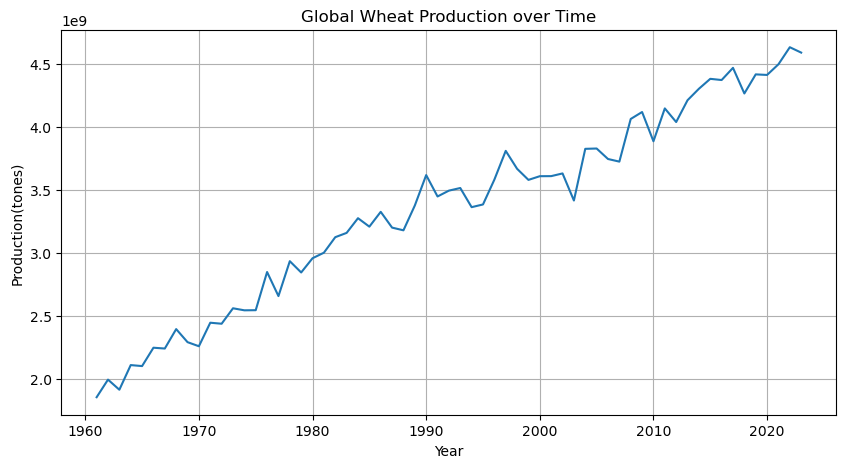

In [59]:
#plt.figure(figsize=(10, 5))
plt.figure(figsize=(10, 5))
sns.lineplot(data= trend_wheat, x = 'Year', y= 'Value')
plt.title('Global Wheat Production over Time')
plt.xlabel('Year')
plt.ylabel('Production(tones)')
plt.grid(True)
plt.show()